In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### About Dataset

https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors

### Questions

  - [x] What are the top 10 happiest and least happy countries?
  - [x] How does happiness score vary across regions?
  - [x] How does happiness score vary across regions?
  - [x] Is there a correlation between GDP per capita and happiness score?
  - [x] What is the distribution of social support across countries?
  - [x] How does healthy life expectancy impact happiness across regions?
  - [x] Which regions have the highest perceptions of corruption?
  - [x] Is there a link between generosity and happiness?
  - [x] How does freedom to make life choices relate to happiness?
  - [x] What are the averages for each metric across regions?
  - [x] Which countries deviate the most from the regional average happiness score?

## Question 1

In [3]:
FilePath = r"C:\Users\GABRIEL\Downloads\WHR_2023.csv"

In [4]:
df = pd.read_csv(FilePath)
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


### What are the top 10 happiest and least happy countries?

In [14]:
# top 10 happiest countries
top_10_happiest = df.nlargest(10, 'happiness_score')
display("The top 10 happiest countries are: ", top_10_happiest["country"])

'The top 10 happiest countries are: '

0        Finland
1        Denmark
2        Iceland
3         Israel
4    Netherlands
5         Sweden
6         Norway
7    Switzerland
8     Luxembourg
9    New Zealand
Name: country, dtype: object

<Axes: title={'center': 'Top Ten Happiest Country'}, xlabel='country'>

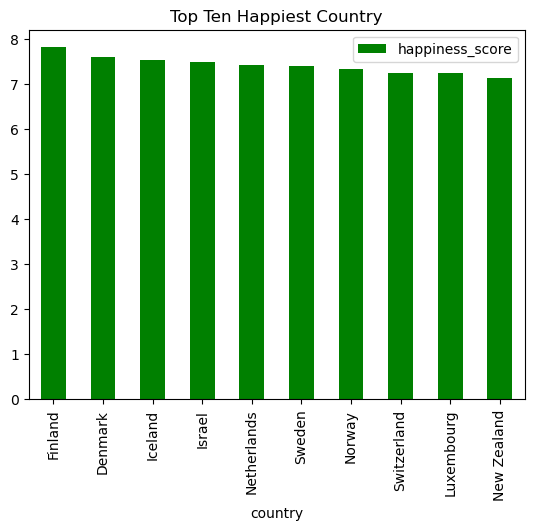

In [15]:
top_10_happiest.plot(x='country', y= 'happiness_score', kind='bar', title='Top Ten Happiest Country', color='green')

__Inference__: _The top 10 happiest countries are shown in the chart above. Finland is the most happiest country with a happinest score of 7.8._

In [16]:
# least 10 happiest countries
least_10_happiest = df.nsmallest(10, 'happiness_score')
display("The least 10 happiest countries are: ", least_10_happiest["country"])

'The least 10 happiest countries are: '

136         Afghanistan
135             Lebanon
134        Sierra Leone
133            Zimbabwe
132    Congo (Kinshasa)
131            Botswana
130              Malawi
129             Comoros
128            Tanzania
127              Zambia
Name: country, dtype: object

<Axes: title={'center': 'Ten Least Happy Country'}, xlabel='country'>

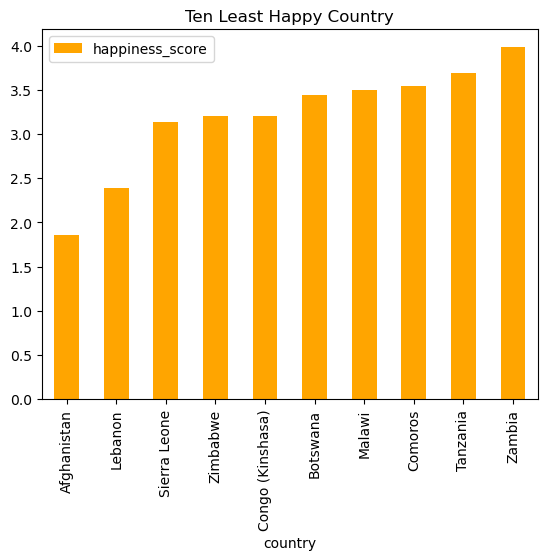

In [17]:
# plot the least 10 happiest countries
least_10_happiest.plot(x='country', y= 'happiness_score', kind='bar', title='Ten Least Happy Country', color='orange')

**Inference**: _From the chart above, we see that Afghanistan is the least happiest country with a happinest score of 1.8._

### How does happiness score vary across regions?

In [18]:
df['region'].unique()

array(['Western Europe', 'Middle East and North Africa',
       'North America and ANZ', 'Central and Eastern Europe',
       'Latin America and Caribbean', 'Southeast Asia', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

<Axes: ylabel='region'>

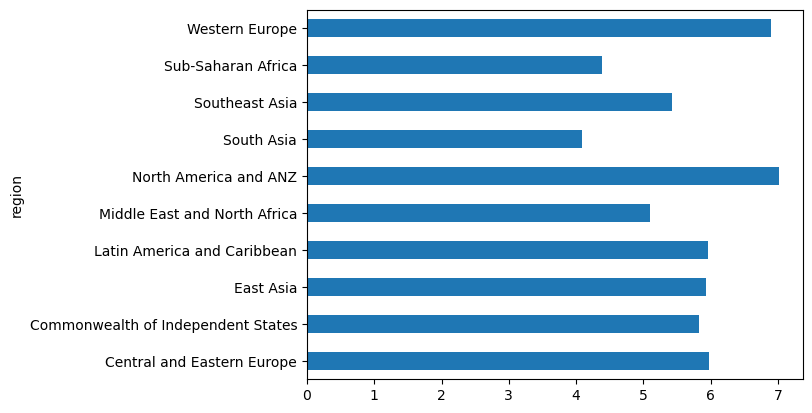

In [19]:
happinessAcrossRegion = df.groupby('region')['happiness_score'].mean()
happinessAcrossRegion.plot(kind='barh')

**Inference**: South Asia has the lowest mean happiness score while the highest is North America and ANZ region. This figures gives an overall idea of the happiest and the least happy region.

### How does happiness score vary across countries for each region?

<Axes: ylabel='region'>

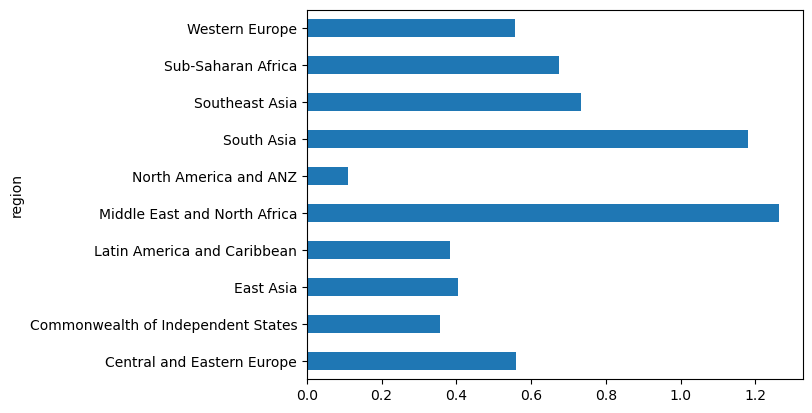

In [25]:
happinessAcrossCountry = df.groupby('region')['happiness_score'].std()
happinessAcrossCountry.plot(kind='barh')

**Inference**: The 'Middle East and North Africa' region have a wider spread of happiness score indicating a higher variation in the score for countries within the region. However, countries in the 'North America and ANZ' have a close range of happiness score.

### Is there a correlation between GDP per capita and happiness score?

In [26]:
corr_gdp_happiness = df[['gdp_per_capita', 'happiness_score']].corr().iloc[0,1]
print(f"The correlation between [gdp_per_capita] and [happiness_score] is {corr_gdp_happiness}")

The correlation between [gdp_per_capita] and [happiness_score] is 0.7843421846477896


<Axes: title={'center': 'Correlation between GDP per capita and happiness score'}, xlabel='gdp_per_capita', ylabel='happiness_score'>

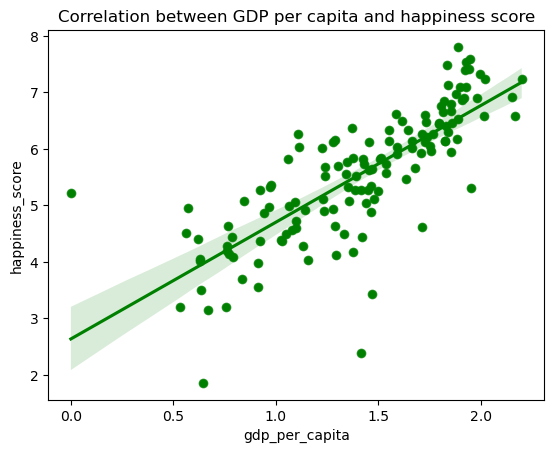

In [28]:
df.plot(x= 'gdp_per_capita', y= 'happiness_score',
        kind= 'scatter',
        title='Correlation between GDP per capita and happiness score',
       color = 'green')

# Plotting the linear relationship between gdp_per_capita and happiness_score
sns.regplot(x='gdp_per_capita', y='happiness_score', data=df, color='green')

**Inference**: The correlation between the gdp_per_capita and happiness score is 0.7843. A positive correlation score indicates that there is strong correlation between the GDP per capita and overall happiness of the country.

### What is the distribution of social support across countries?

<Axes: xlabel='Social Support', ylabel='Frequency'>

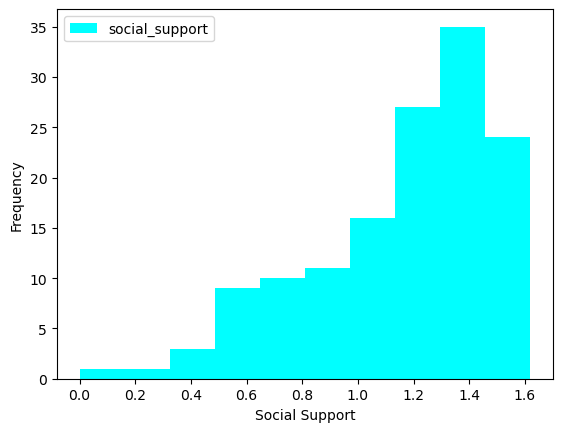

In [33]:
# plotting the distribution of social support across countries
df.plot(x= 'country', y='social_support', kind='hist', xlabel= 'Social Support', ylabel= 'Frequency', color='cyan')

**Inference**: The chart shows a positive skewed distribution indicating that more countries have a higher social support.

### How does healthy life expectancy impact happiness across regions?

In [35]:
corr_life_happiness = df[['healthy_life_expectancy', 'happiness_score']].corr().iloc[0,1].round(4)
print(f"The correlation between [healthy_life_expectancy] and [happiness_score] is {corr_life_happiness}")

The correlation between [healthy_life_expectancy] and [happiness_score] is 0.7467


<Axes: title={'center': 'Correlation between Life Expectancy and happiness score'}, xlabel='healthy_life_expectancy', ylabel='happiness_score'>

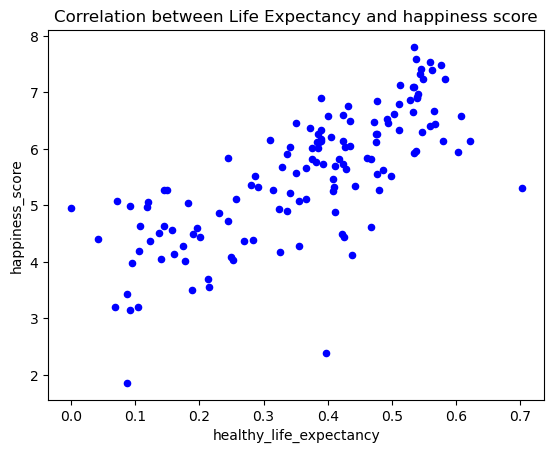

In [28]:
df.plot(x= 'healthy_life_expectancy', y= 'happiness_score',
        kind= 'scatter',
        title='Correlation between Life Expectancy and happiness score',
       color = 'blue')

**Inference**:_A strong positive correlation indicates that happiness mood of the people has a strong impact on their life expectancy. That is, the more happier a person is, the more likely they will stay healthy throughtout their lifetime._

### Which regions have the highest perceptions of corruption?

In [44]:
highest_perception_of_corruption = df.groupby(['region'])['perceptions_of_corruption'].sum().sort_values(ascending=True)
highest_perception_of_corruption = highest_perception_of_corruption.idxmax()
print(f"{highest_perception_of_corruption} has the highest Perception of Corruption")

Western Europe has the highest Perception of Corruption


It can be observed that Western Europe has the highest perception of corruption with a value of 6.03

<Axes: title={'center': 'Regions with Highest Perception of Corruption'}, xlabel='region'>

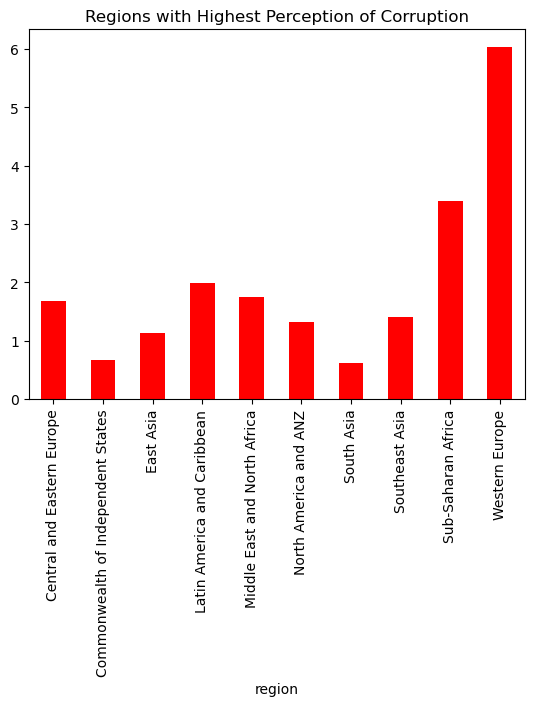

In [45]:
highest_perception_of_corruption.plot(x='region', 
                                      title="Regions with Highest Perception of Corruption", 
                                      kind= 'bar', 
                                      color = 'red')

__Inference:__ _The chart shows that Western Europe has the highest perception of corruption_

### Is there a link between generosity and happiness?

In [45]:
correlation_between_generosity_and_happiness = df[['happiness_score', 'generosity']].corr().iloc[0,1].round(4)
print(f"The correlation between generosity and happiness score is {correlation_between_generosity_and_happiness}")

The correlation between generosity and happiness score is 0.0437


<Axes: title={'center': 'Correlation between Happiness score and Generosity'}, xlabel='happiness_score', ylabel='generosity'>

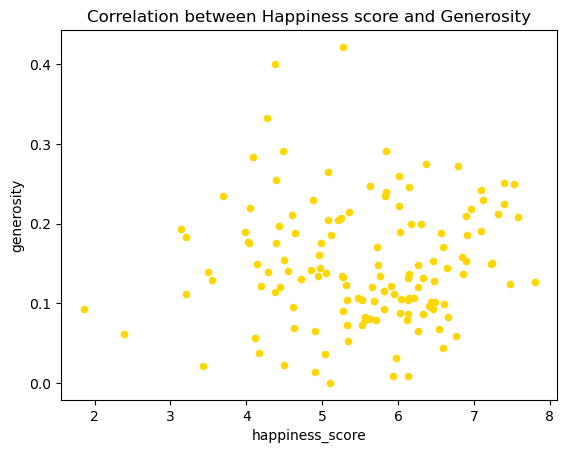

In [62]:
df.plot(x='happiness_score', 
        y='generosity', 
        kind='scatter',
       title='Correlation between Happiness score and Generosity',
       color='gold')

__Inference:__ _A very weak correlation shows there is an unnoticable or practically no relationship between the happiness score and generosity. That is, that someone is happy does not necessarily imply he will be generous'_


### How does freedom to make life choices relate to happiness?

In [46]:

df[['freedom_to_make_life_choices', 'happiness_score']].corr().iloc[0, 1].round(4)

0.6629

<Axes: title={'center': 'Relationship between freedom to make life choices and happiness'}, xlabel='freedom_to_make_life_choices', ylabel='happiness_score'>

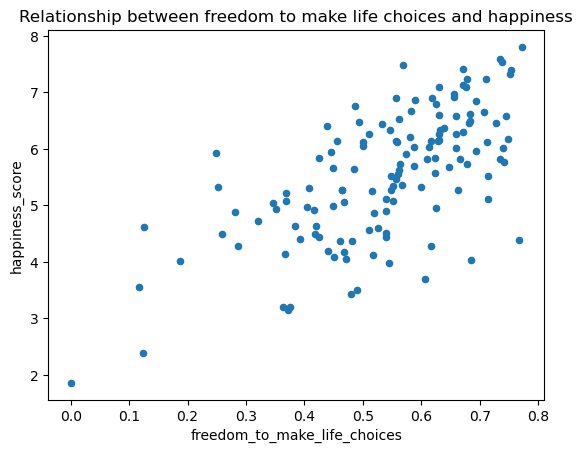

In [70]:
# Plotting the freedom to make choices against happiness score 
df.plot(x='freedom_to_make_life_choices', y='happiness_score', kind='scatter', title= 'Relationship between freedom to make life choices and happiness')

__Inference:__ _A positive relationship indicates that freedom to make life choices has a moderate impact on the happiness mood of the people. If people are allowed to make choices at their will, they will be happy to some extent_

### What are the averages for each metric across regions?

In [47]:
# Grouping the regions and taking the mean of the columns with numerical values
average_across_regions = df.groupby('region')[df.columns[2:]].mean()
average_across_regions

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
region,,,,,,,
Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
Latin America and Caribbean,5.966053,1.349632,1.260000,0.412158,0.605895,0.109158,0.104632
Middle East and North Africa,5.102143,1.514571,1.081214,0.403846,0.433929,0.099286,0.124786
North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
South Asia,4.089000,1.069833,0.682500,0.259833,0.486500,0.147167,0.104500
Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
Sub-Saharan Africa,4.382485,0.912848,0.812788,0.148788,0.428394,0.164727,0.102697


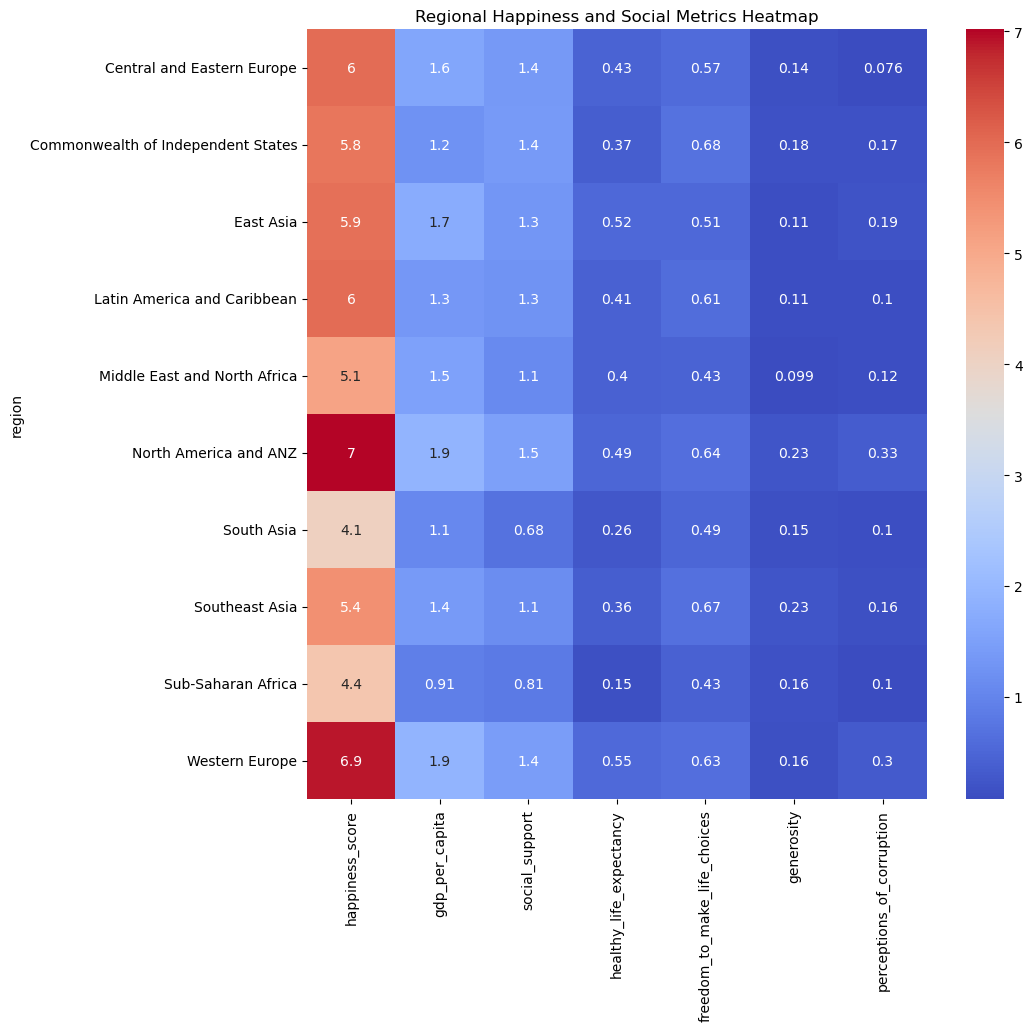

In [48]:
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(average_across_regions, annot=True, cmap="coolwarm", cbar=True)
plt.title("Regional Happiness and Social Metrics Heatmap")
plt.show()

### Which countries deviate the most from the regional average happiness score?

In [113]:
df.groupby('country')['happiness_score'].std()

country
Afghanistan   NaN
Albania       NaN
Algeria       NaN
Argentina     NaN
Armenia       NaN
               ..
Uzbekistan    NaN
Venezuela     NaN
Vietnam       NaN
Zambia        NaN
Zimbabwe      NaN
Name: happiness_score, Length: 137, dtype: float64

In [114]:
df['country'].nunique()

137

In [115]:
df.head(2)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525


## Question 2

[click here for the question](https://docs.google.com/document/d/12YpLzEjmSLc1ZJc1tW4a4rivhCRq6tEav7Az2uW6B28/edit?usp=sharing)file/d/1JJH7-KVN0wLNh_L0d0-iWexTgdjiX7VN/view?usp=drive_link


In [119]:
# reading the data
df2 = pd.read_csv(r"C:\Users\GABRIEL\Downloads\iot_telemetry_data.csv")
df2.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [121]:
#Import the needed libraries
from datetime import datetime

#Function to convert epoch timestamp to Datetime
def convertToDateTime(ts):
    dateTimeObj = datetime.fromtimestamp(ts)
    return dateTimeObj


#Convert the epoch timestamp to Datetime and add as a new column to the dataframe
df2['DateTime'] = df2['ts'].apply(lambda x: convertToDateTime(x))

#Drop the original epoch timestamp ('ts')
df2 = df2.drop('ts', axis =1 )

#Set the DateTime column as the index for time-series analysis
df2.set_index('DateTime', inplace=True)

In [125]:
#Replace device ID to a more relatable name
#df2['device'] = df['device'].replace({'b8:27:eb:bf:9d:51': 'Device 1',
                                     # '00:0f:00:70:91:0a': 'Device 2',
                                     # '1c:bf:ce:15:ec:4d': 'Device 3'})

# Step 1: Get unique device IDs
unique_device_ids = df2['device'].unique()

# Step 2: Create a dictionary to map device IDs to 'Device N'
device_mapping = {device_id: f"Device {i+1}" for i, device_id in enumerate(unique_device_ids)}

# Step 3: Replace device IDs with the new 'Device N' labels
df2['device'] = df2['device'].replace(device_mapping)

# Check the dataframe after replacement
df2.head()


,device,co,humidity,light,lpg,motion,smoke,temp
DateTime,,,,,,,,
2020-07-12 01:01:34.385975,Device 1,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
2020-07-12 01:01:34.735568,Device 2,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2020-07-12 01:01:38.073573,Device 1,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
2020-07-12 01:01:39.589146,Device 3,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
2020-07-12 01:01:41.761235,Device 1,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 405184 entries, 2020-07-12 01:01:34.385975 to 2020-07-20 01:03:37.264313
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   device    405184 non-null  object 
 1   co        405184 non-null  float64
 2   humidity  405184 non-null  float64
 3   light     405184 non-null  bool   
 4   lpg       405184 non-null  float64
 5   motion    405184 non-null  bool   
 6   smoke     405184 non-null  float64
 7   temp      405184 non-null  float64
dtypes: bool(2), float64(5), object(1)
memory usage: 22.4+ MB


### What is the average temperature and humidity across all devices?
__Hint:__  _Think about the overall __"typical"__ conditions across all devices. By calculating the mean, you get a sense of the central tendency for temperature and humidity, helping to understand the general environment the devices are monitoring._

The Average temperature and humidity across devices is: 
           humidity     temp
device                     
Device 1   50.8141  22.2800
Device 2   75.4444  19.3626
Device 3   61.9102  26.0255


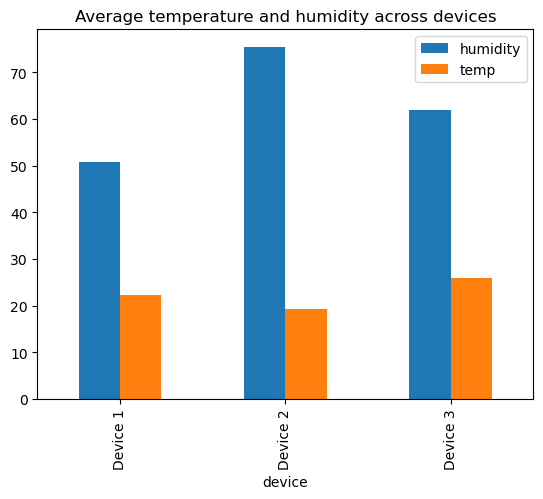

In [134]:
df2.groupby(['device'])[['humidity', 'temp']].mean().round(4).plot(kind='bar', title="Average temperature and humidity across devices")
print(f"The Average temperature and humidity across devices is: \n {df2.groupby(['device'])[['humidity', 'temp']].mean().round(4)}")

__Inference__: _We can observe from the chart that device 2 has the highest average humidity (75.4444) and least temperature (19.3626): This suggests that Device 2 might be placed in an environment where higher humidity levels are present, and the temperature tends to be lower. This indicate that Device 2 is monitoring conditions in a cooler and more humid environment (e.g., a basement, storage area, or certain industrial or agricultural settings).
- Device 3 has the highest temperature (26.0255) and moderate humidity (61.9102), indicating it may be placed in a warmer environment compared to the other devices.

- Device 1 has a moderate humidity level (50.8141) and temperature (22.2800), possibly indicating a more neutral or standard environment, neither too humid nor too hot.

### What are the maximum and minimum values for each sensor (CO, temperature, humidity, etc.)?
__Hint:__ By identifying these extremes, you can spot any outliers or unusual conditions that may need attention, such as sensor malfunctions or areas with extreme environmental conditions.

In [155]:
num_col = df2.select_dtypes(exclude=['datetime', 'bool', 'object']).reset_index(drop=True)
num_col

,co,humidity,lpg,smoke,temp
0,0.004956,51.000000,0.007651,0.020411,22.700000
1,0.002840,76.000000,0.005114,0.013275,19.700001
2,0.004976,50.900000,0.007673,0.020475,22.600000
3,0.004403,76.800003,0.007023,0.018628,27.000000
4,0.004967,50.900000,0.007664,0.020448,22.600000
...,...,...,...,...,...
405179,0.003745,75.300003,0.006247,0.016437,19.200001
405180,0.005882,48.500000,0.008660,0.023301,22.200000
405181,0.004540,75.699997,0.007181,0.019076,26.600000
405182,0.003745,75.300003,0.006247,0.016437,19.200001


In [182]:
largest_values = num_col[['co', 'humidity', 'lpg', 'smoke', 'temp']].max()
largest_values

co           0.014420
humidity    99.900002
lpg          0.016567
smoke        0.046590
temp        30.600000
dtype: float64

__Inference:__ _Maximum values show the highest recorded readings for each sensor (e.g., the highest temperature is 30.6°C, and the highest humidity is 99.9%)._

In [184]:
smallest_values = num_col[['co', 'humidity', 'lpg', 'smoke', 'temp']].min()
smallest_values

co          0.001171
humidity    1.100000
lpg         0.002693
smoke       0.006692
temp        0.000000
dtype: float64

__Inference:__ _Minimum values show the lowest recorded readings for each sensor (e.g., the lowest temperature is 0.0°C, and the lowest humidity is 1.1%)._

<Axes: >

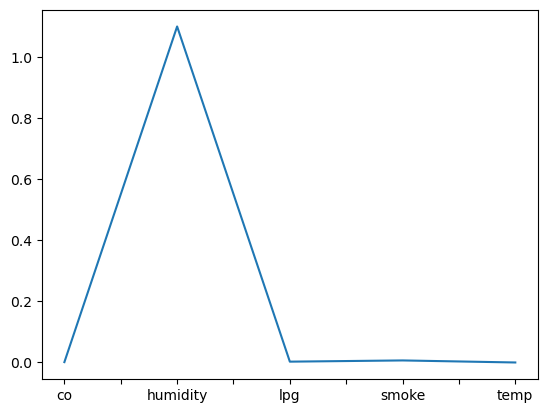

In [185]:
smallest_values.plot()

### How much variance is there in the temperature and humidity readings across the devices?

__
Hin:__  Variance measures the spread of the data. If the variance is high, it means the readings are spread out, which could indicate less stability in the environment or the device's performance. Low variance suggests more consistency.


In [186]:
df2.head(2)

,device,co,humidity,light,lpg,motion,smoke,temp
DateTime,,,,,,,,
2020-07-12 01:01:34.385975,Device 1,0.004956,51.0,False,0.007651,False,0.020411,22.700000
2020-07-12 01:01:34.735568,Device 2,0.002840,76.0,False,0.005114,False,0.013275,19.700001


In [187]:
df2.groupby(['device'])[['temp', 'humidity']].var().round(4)

,temp,humidity
device,,
Device 1,0.2322,3.5680
Device 2,0.4145,3.9038
Device 3,4.1064,80.0093


__Inference 1:__ _The temperature variance is quite high across the devices. While Device 1 and Device 2 have relatively low temperature values, Device 3 has a much higher temperature reading (4.1064), which contributes to the significant spread (variance). This suggests that Device 3 is in a very different environment in terms of temperature compared to Devices 1 and 2._

__Inference 2:__ _The humidity variance is extremely high, primarily because Device 3 has a much higher humidity value (80.0093) compared to the others (3.5680 and 3.9038). This suggests that Device 3 is exposed to a very humid environment, possibly indicating an outlier or abnormal reading, whereas Devices 1 and 2 are in more stable, lower-humidity conditions._

### What is the average daily temperature for each device?

Hint: This helps in understanding how temperature fluctuates over time and how devices are affected by day-to-day changes in the environment.


In [192]:
average_daily_temp = df2.groupby(['device'])['temp'].mean()
average_daily_temp

device
Device 1    22.279969
Device 2    19.362552
Device 3    26.025511
Name: temp, dtype: float64

<Axes: xlabel='device'>

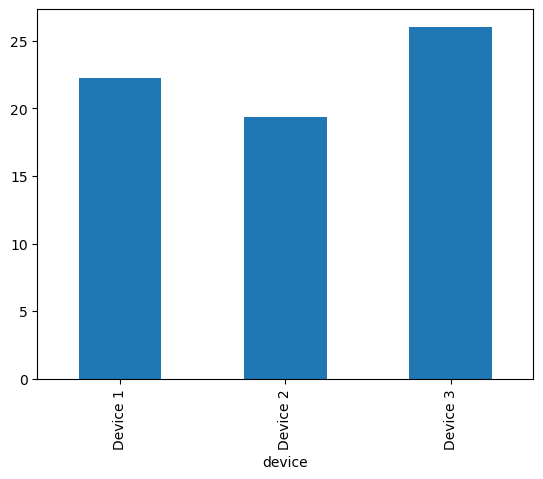

In [193]:
average_daily_temp.plot(kind='bar')

__Inference__: Device 3 is in an environment with the highest average daily temperature (26.03°C), which may suggest it is placed in a warmer location compared to the other two devices.
Device 2, with the lowest average daily temperature of 19.36°C, may be in a cooler environment, possibly experiencing milder or cooler conditions relative to the other devices.
Device 1 falls in between with an average temperature of 22.28°C, indicating a moderate temperature range compared to the other two.

### How do temperature and humidity readings correlate across different devices?
Hint: Correlation helps us understand if two variables (like temperature and humidity) change together. This relationship could be useful in predicting sensor behaviour or environmental trends.


In [200]:
df2.groupby('device')[['temp', 'humidity']].corr().unstack().iloc[:, 1]

device
Device 1   -0.372977
Device 2    0.293223
Device 3   -0.397001
Name: (temp, humidity), dtype: float64

__Inference:__ 
- Device 1: The correlation of -0.372977 indicates a moderate negative correlation between temperature and humidity. This means that as the temperature increases, humidity tends to decrease, but the relationship is not very strong.-

- Device 2: The correlation of 0.293223 indicates a weak positive correlation. This means that as the temperature increases, the humidity slightly increases as well. The relationship is weak, meaning there isn't a strong connection between temperature and humidity in this device's readings.

- Device 3: The correlation of -0.397001 is also a moderate negative correlation, similar to Device 1. This indicates that, on this device, as the temperature increases, humidity decreases, but again, the relationship is not strong.

__General Insights:__
- Devices 1 and 3 exhibit a moderate negative correlation between temperature and humidity, suggesting that higher temperatures generally lead to lower humidity. 
- Device 2 shows a weak positive correlation, meaning there is a slight tendency for temperature and humidity to increase together, but the correlation is weak, and other factors may influence this relationship.

### What temporal trends can you identify in the dataset, such as changes in temperature, humidity, or other sensor readings over the week?
Hint: Temporal trends help identify patterns over time. By resampling the data to a daily frequency, you can observe how conditions like temperature and humidity change from day to day, providing insights into cyclical or variations


In [211]:
#df2['DateTime'] = pd.to_datetime(df2['DateTime'])  # Make sure 'DateTime' is a datetime object
#df2.set_index('DateTime', inplace=True)  # Set 'DateTime' as the index
#weekly_trends = df2.resample('D').mean() # Resample to daily frequency 
df2.columns

Index(['level_0', 'index', 'device', 'co', 'humidity', 'light', 'lpg',
       'motion', 'smoke', 'temp'],
      dtype='object')

In [203]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])  # Make sure 'DateTime' is a datetime object
df2.set_index('DateTime', inplace=True)  # Set 'DateTime' as the index
weekly_trends = df2.resample('D').mean() # Resample to daily frequency 

Index(['device', 'co', 'humidity', 'light', 'lpg', 'motion', 'smoke', 'temp'], dtype='object')

In [213]:
df2.index

DatetimeIndex(['2020-07-12 01:01:34.385975', '2020-07-12 01:01:34.735568',
               '2020-07-12 01:01:38.073573', '2020-07-12 01:01:39.589146',
               '2020-07-12 01:01:41.761235', '2020-07-12 01:01:44.468411',
               '2020-07-12 01:01:45.448864', '2020-07-12 01:01:46.869076',
               '2020-07-12 01:01:48.275382', '2020-07-12 01:01:49.136687',
               ...
               '2020-07-20 01:03:24.269880', '2020-07-20 01:03:25.039890',
               '2020-07-20 01:03:26.203541', '2020-07-20 01:03:29.889807',
               '2020-07-20 01:03:30.755704', '2020-07-20 01:03:33.162015',
               '2020-07-20 01:03:33.576561', '2020-07-20 01:03:36.167959',
               '2020-07-20 01:03:36.979522', '2020-07-20 01:03:37.264313'],
              dtype='datetime64[ns]', name='DateTime', length=405184, freq=None)

In [234]:
df2.reset_index(inplace=True)

In [215]:
df2.columns

Index(['DateTime', 'level_0', 'index', 'device', 'co', 'humidity', 'light',
       'lpg', 'motion', 'smoke', 'temp'],
      dtype='object')

In [235]:
df2['DateTime']=pd.to_datetime(df2['DateTime'])

In [236]:
df2.set_index('DateTime', inplace=True)

In [237]:
df2 = df2.drop(columns=['level_0', 'index'], errors='ignore')

In [238]:
weekly_trends = df2.resample('D').sum()  #select_dtypes(include=['int64', 'float64']) # Resample to daily frequency
weekly_trends

,device,co,humidity,light,lpg,motion,smoke,temp
DateTime,,,,,,,,
2020-07-12,Device 1Device 2Device 1Device 3Device 1Device...,211.170577,2.998552e+06,14657,335.807142,84,890.905102,1.077177e+06
2020-07-13,Device 1Device 3Device 1Device 2Device 3Device...,249.671874,3.002280e+06,13702,383.173402,82,1023.039502,1.100404e+06
2020-07-14,Device 2Device 1Device 3Device 1Device 2Device...,232.138018,3.039528e+06,14755,365.801966,61,972.254797,1.131315e+06
2020-07-15,Device 3Device 1Device 2Device 1Device 2Device...,223.342869,2.958067e+06,13990,355.113209,66,942.170344,1.166186e+06
2020-07-16,Device 1Device 3Device 2Device 1Device 1Device...,246.772006,3.013484e+06,15500,380.125904,39,1014.011504,1.150936e+06
2020-07-17,Device 1Device 2Device 1Device 1Device 3Device...,221.057809,3.248016e+06,12764,345.581992,45,918.978624,1.114134e+06
2020-07-18,Device 3Device 1Device 2Device 3Device 1Device...,247.625937,3.019872e+06,12876,380.347349,56,1015.316238,1.133863e+06
2020-07-19,Device 1Device 3Device 2Device 1Device 3Device...,236.995128,3.101171e+06,13722,369.761496,43,984.190484,1.174519e+06
2020-07-20,Device 2Device 1Device 3Device 1Device 1Device...,10.811405,1.374008e+05,561,16.655061,6,44.440683,4.946280e+04


__Inference__: Please I don't understand this part ma.

### What is the 7-hour moving average for temperature and humidity?
Hint: With the hourly frequency calculated in question 7 find the moving average for a window of 7. The 7-hour moving average will give you a clearer picture of how temperature and humidity are changing over time, removing noise from the data.


In [246]:
moving_average = df2[['humidity', 'temp']].rolling(window=7).mean()
moving_average.dropna().round(2)

,humidity,temp
DateTime,,
2020-07-12 01:01:45.448864,62.06,23.46
2020-07-12 01:01:46.869076,65.63,23.03
2020-07-12 01:01:48.275382,65.90,24.07
2020-07-12 01:01:49.136687,65.90,24.07
2020-07-12 01:01:52.798518,62.20,23.44
...,...,...
2020-07-20 01:03:33.162015,63.96,22.64
2020-07-20 01:03:33.576561,63.97,22.63
2020-07-20 01:03:36.167959,63.94,22.63


### What is the impact of environmental conditions on the stability of the sensor readings?
Hint: Stability can be measured using the standard deviation (how spread out the readings are). Recall that each device has different environmental conditions. Stability may indicate the device is placed in a consistent environment.

In [250]:
df2.groupby('device')[['co',	'humidity',	'light',	'lpg',	'motion', 'smoke', 'temp']].std()

,co,humidity,light,lpg,motion,smoke,temp
device,,,,,,,
Device 1,0.000559,1.888926,0.125512,0.000599,0.027706,0.001720,0.481902
Device 2,0.001479,1.975801,0.176711,0.001700,0.005180,0.004809,0.643786
Device 3,0.000320,8.944792,0.000000,0.000373,0.056150,0.001055,2.026427


- __Low Standard Deviation:__ co (0.000559), lpg (0.000599), and smoke (0.001720) — Sensor readings in these conditions show minimal fluctuation, implying that Device 1 experiences stability in gas measurements.
Moderate Standard Deviation: humidity (1.888926), light (0.125512), and temp (0.481902) — Device 1 has moderate variability in humidity, light, and temperature. This may suggest slight environmental changes but generally remains stable.
Implication: Device 1 is relatively stable, though it experiences some fluctuations in environmental light, humidity, and temperature.
Device 2
Low Standard Deviation: co (0.001479), lpg (0.001700), motion (0.005180), and smoke (0.004809) — Consistent readings here indicate stable measurement conditions.
Moderate to High Standard Deviation: humidity (1.975801), light (0.176711), and temp (0.643786) — These readings vary more, which may suggest Device 2 is exposed to variable lighting and temperature.
Implication: Device 2 is generally stable in gas measurements but could be influenced by changing lighting and temperature levels in its environment.
Device 3
Low Standard Deviation: co (0.000320) and lpg (0.000373) — Stable in gas-related measurements.
High Standard Deviation: humidity (8.944792) and temp (2.026427) — Device 3 shows substantial variation in humidity and temperature, indicating a highly variable or humid environment.
No Variation in Light: light (0.000000) — This suggests constant lighting conditions, likely a controlled or dark environment.
Implication: Device 3 faces significant instability due to high humidity and temperature variability, indicating it might be placed in an inconsistent environment regarding these conditions.
Summary and Recommendations
Device Stability: Devices 1 and 2 appear to operate in relatively stable environments, with some moderate fluctuations. Device 3, however, faces high humidity and temperature variability, likely compromising its stability.
Device Placement Adjustment:
Device 3: Consider relocating it to a more controlled humidity and temperature environment to improve stability.
Device 1 and Device 2: Minor adjustments may help mitigate light or temperature variability.

### Based on your analysis of temperature, humidity, CO levels, and light across different devices, what recommendations will you make to the management on the performance of these prototype devices and for optimising device placement, maintenance schedules, and safety protocols?

Hint: Based on the analysis of the data (average values, trends, variance, and correlations), you can make informed decisions about where devices should be placed for better accuracy, how often they should be checked or maintained, and any safety precautions that should be taken (for example, if certain conditions are potentially dangerous). Use the insights gained to propose actionable steps.

Based on the analysis of sensor data across various environmental conditions, several recommendations emerge to optimize device performance, placement, maintenance, and safety. First, the high variability in temperature and humidity observed for Device 3 suggests it may be located in a less stable or harsher environment. Relocating this device to a more moderate area could reduce variance and improve data stability. Devices 1 and 2, which operate in more consistent conditions, may provide more reliable readings if maintained in environments with moderate temperatures (between 20°C - 25°C) and humidity levels below 60%.

In terms of maintenance, Device 3’s exposure to higher humidity indicates a need for more frequent servicing. Humidity can accelerate sensor degradation, so monthly recalibration and checks for Device 3 would be prudent, while Devices 1 and 2 could follow a bi-monthly maintenance schedule to ensure consistent accuracy. Safety protocols should include thresholds to trigger alerts when humidity exceeds 80% or temperature goes beyond 30°C, as these conditions may compromise device performance. Ensuring that devices are shielded from direct sunlight and highly humid areas would also help prevent potential issues related to overheating and moisture damage.

The moderate negative correlation between temperature and humidity for Devices 1 and 3 suggests that sensor accuracy could be affected by these environmental dependencies. Regular calibration is recommended, especially for these devices, to account for any shifts in temperature-humidity relationships. Additionally, identifying locations with lower environmental variance could further enhance device stability and reduce the frequency of necessary maintenance. Implementing these recommendations will optimize device placement and ensure proactive maintenance and safety measures, ultimately enhancing data reliability and extending device longevity.